# Bootstrap Vetrauensinterval
Implementation von Hand --> Funktionsweise

In [35]:
import numpy as np

x = np.array([30, 37, 36, 43, 42, 43, 43, 46, 41, 42]) 
n = x.size

xbar = x.mean() # Arithmetisches Mittel der gegebene Datenreihe 

# Zufallsdaten erzeugen
nboot = 20 # Anzahl Bootstrap Samples 
tmpdata = np.random.choice(x, n*nboot, replace=True) # erzeuge n*nboot Zufallszahlen aus x

# Zufallszahlen in eine Matrix umformen
bootstrapsample = np.reshape(tmpdata, (n, nboot))   

# Mittelwert für jede Spalte berechnen und nach grösse sortieren
xbarstar = bootstrapsample.mean(axis=0) # berechnen
# xbarstar = np.sort(xbarstar) # sortieren   

# vertrauensintervall berechnen
# für Signifikansniveau alpha = 5% --> Quantile 2.5% und 97.5% 
# Damit werden die unteren und oberen 2.5% der Werte abgeschnitten
q1 = 2.5
q2 = 97.5

# ci gibt das Vetrauensintervall an
ci = np.percentile(xbarstar, q=[q1, q2])
print("95%-Bootstrap-Vertrauensintervall: ", ci)

95%-Bootstrap-Vertrauensintervall:  [38.48  42.305]


In [36]:
# Werden mehr bootstrap samples verwendet, wird das Vertrauensintervall kleiner
x = np.array([30, 37, 36, 43, 42, 43, 43, 46, 41, 42]) 
n = x.size
nboot = 1000000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))   
xbarstar = bootstrapsample.mean(axis=0)
ci = np.percentile(xbarstar, q=[2.5, 97.5])
print("95%-Bootstrap-Vertrauensintervall: ", ci)

95%-Bootstrap-Vertrauensintervall:  [37.3 42.8]


# Bootstrap 
Code: mit „richtigem” Bootstrap

In [3]:
# alles was wir angeben müssen, ist die Testreihe und die Anzahl der Bootstrap Samples
x = np.array([30, 37, 36, 43, 42, 43, 43, 46, 41, 42]) # Daten
nboot = 20 # Bootstrap Samples

n = x.size
xbar = x.mean()

tmpdata         = np.random.choice(x, n*nboot, replace=True) 
bootstrapsample = np.reshape(tmpdata, (n, nboot)) 
xbarstar        = bootstrapsample.mean(axis=0)
deltastar       = xbarstar - xbar
d = np.percentile(deltastar, q=[2.5, 97.5])

ci = xbar - [d[1], d[0]] 
print("Vertrauensintervall: ",ci)

Vertrauensintervall:  [38.1475 44.115 ]


### Interpretation von Vertrauensinvervallen
--> Zeigt, dass nur rund 95% aller berechnetten Vertrauensintervalle effektiv den wahren Mittelwert enthalten.

In [45]:
# Demonstration der W'keit 95%

# Simulation von Daten deren wahres mu wir können (mu=40, standardabweichung sigma=5)
x = np.random.normal(loc=40, scale=5, size=100000)

sample = np.reshape(x,(1000,100))

nboot = 1000
n = 100
k=0
for i in range(0,1000):
    y = sample[i]
    xbar = y.mean()
    tmpdata = np.random.choice(y, n*nboot, replace=True) 
    bootstrapsample = np.reshape(tmpdata, (n, nboot)) 
    xbarstar = bootstrapsample.mean(axis=0)
    deltastar = xbarstar - xbar
    d = np.percentile(deltastar, q=[2.5, 97.5])
    if xbar-d[1]<= 40 <= xbar-d[0]:
        k=k+1

print(f'Anzahl der Prozesse, in denen 40 im Vertrauensintervall liegt: {k} = {((k/1000)*100):.2f}%')

Anzahl der Prozesse, in denen 40 im Vertrauensintervall liegt: 954 = 95.40%


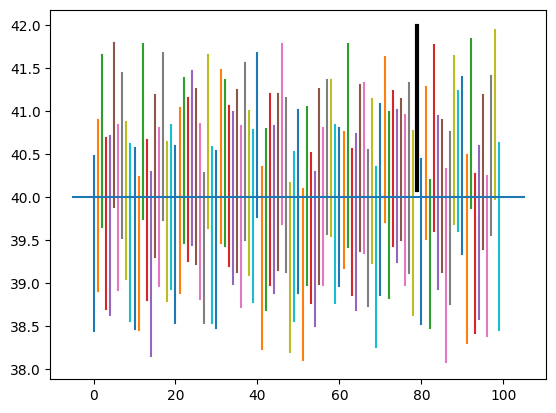

In [1]:
# Grafisch dargestellt

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#np.random.seed(8)

# Wir generieren 10'000 normalverteilte Zufallszahlen
# mit Mittelwert 40 und Standardabweichung 5
x = np.random.normal(loc=40, scale=5, size=10000)

# Wir ordnen die Zufallszahlen in einem array mit 100 Spalten
# und 100 Zeilen an
measurement_array = np.reshape(x,(100,100))

# Anzahl Bootstrap Samples
nboot = 10000
n = 100

# Wir iterieren über die 100 Testreihen
for i in range(0,100):
    # wir lesen die i-te Zeile aus dem measurement_array heraus
    y = measurement_array[i]
    # Bestimmung des Vertrauensintervalls der i-ten Testreihe
    tmpdata = np.random.choice(y, n*nboot, replace=True)
    bootstrapsample = np.reshape(tmpdata, (n, nboot))
    xbarstar = bootstrapsample.mean(axis=0)
    ci = np.percentile(xbarstar, q=[2.5, 97.5])
    plt.plot([i,i],[ci[0], ci[1]])
    if ~(ci[0]<= 40 <= ci[1]):
        plt.plot([i,i],[ci[0], ci[1]], c="black",linewidth=3)

plt.plot([-5,105],[40,40])
plt.show()  